In [101]:
# Importa librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [102]:
df = pd.read_csv('../data/docentes_clean.csv')
df.head()

,cod_mod,dir_cen,niv_mod,area_censo,dpto,prov,dist,dre_ugel,region_e,docentes_hombres,...,docentes_contratados,docentes_25_menos_años,docentes_2635_años,docentes_3645_años,docentes_4655_años,docentes_5665_años,docentes_66_a_mas_años,docentes_con_titulo,docentes_sin_titulo,docentes_total
0,539213,EL MUYO S/N,A2,2,AMAZONAS,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,...,0,1,2,2,1,0,0,6,0,6
1,585661,CALLE MIGUEL MONTEZA TAFUR S/N,A2,2,AMAZONAS,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,...,1,1,1,0,1,1,0,4,0,4
2,708081,LA LIBERTAD S/N,A2,2,AMAZONAS,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,...,0,0,0,1,1,0,0,2,0,2
3,708099,EL PORVENIR S/N,A2,2,AMAZONAS,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,...,2,1,1,1,0,0,0,3,0,3
4,767939,AVENIDA DOS DE MAYO 557,A2,2,AMAZONAS,BAGUA,ARAMANGO,UGEL BAGUA,DRE AMAZONAS,0,...,0,0,0,0,2,0,0,2,0,2


Distribución por Distrito

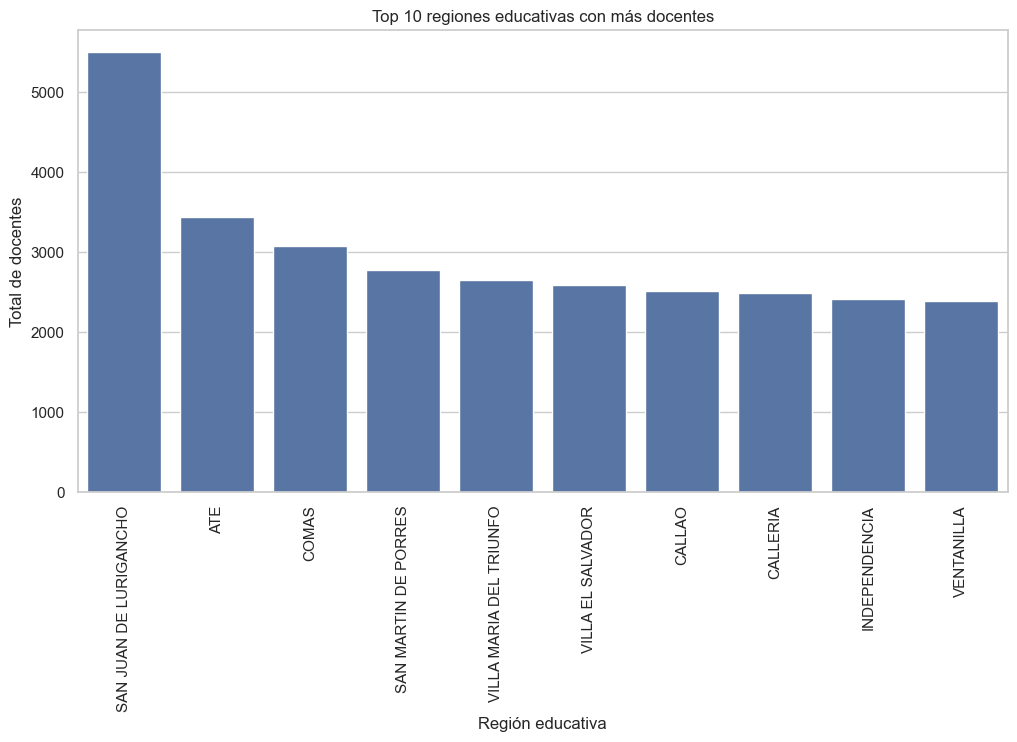

In [103]:
region_educativa = df.groupby('dist')['docentes_total'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=region_educativa.head(10), x='dist', y='docentes_total')
plt.title("Top 10 regiones educativas con más docentes")
plt.xticks(rotation=90)
plt.xlabel("Región educativa")
plt.ylabel("Total de docentes")
plt.show()

Insight: ¿Qué distrito contienen cantidad de docentes?
- Presenta una mayor cantidad de docentes **SJL**, **ATE**, **COMAS**, **SMP**, **VMT**

Distribución por nivel/modalidad

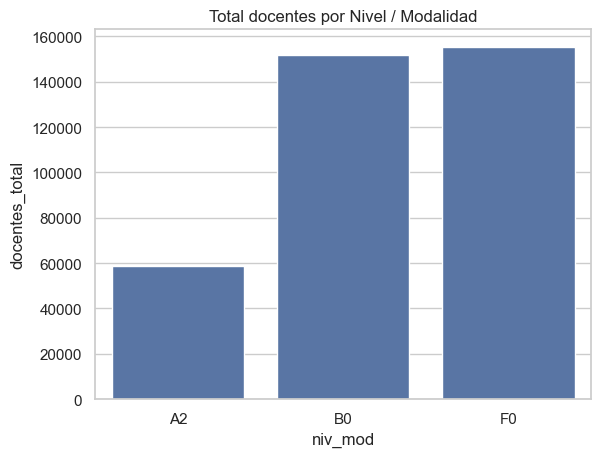

In [104]:
niveles = df.groupby('niv_mod')['docentes_total'].sum().reset_index()
sns.barplot(data=niveles, x='niv_mod', y='docentes_total')
plt.title("Total docentes por Nivel / Modalidad")
plt.show()

Insight: ¿En que nivel hay mayor cantidad de docentes?
- Presenta una mayor concentración en **B0-primaria** y **F0-secundaria**

Distribución por área geográfica

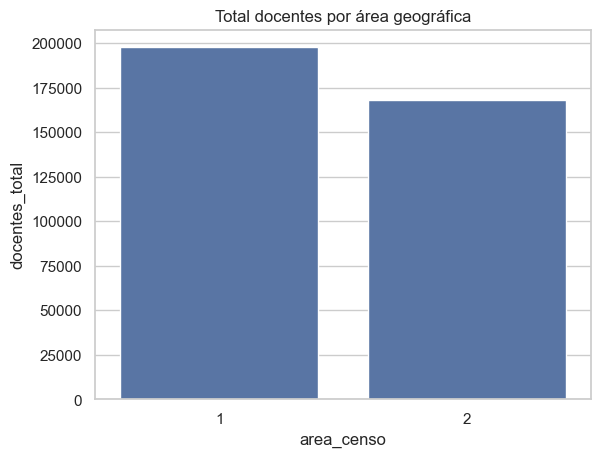

In [105]:
areas = df.groupby('area_censo')['docentes_total'].sum().reset_index()
sns.barplot(data=areas, x='area_censo', y='docentes_total')
plt.title("Total docentes por área geográfica")
plt.show()

Insight: ¿Hay regiones rurales con menos docentes?

- El área **2-Rural** concentra menos docentes en comparación con el área **1-Urbana**.
- Esto refleja posibles brechas de cobertura educativa en zonas de difícil acceso.
- Es relevante para políticas públicas de distribución de personal.

Distribución por grupo de edad

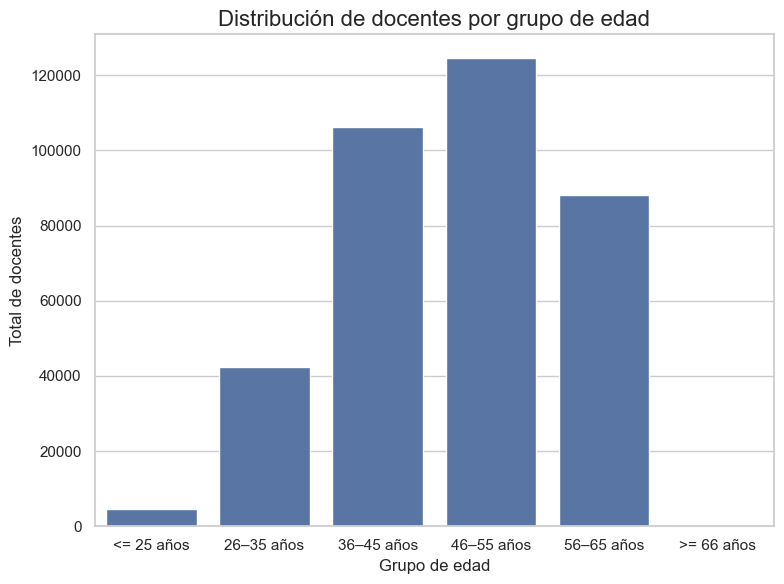

In [106]:
edad_cols = [
    'docentes_25_menos_años', 
    'docentes_2635_años', 
    'docentes_3645_años', 
    'docentes_4655_años', 
    'docentes_5665_años', 
    'docentes_66_a_mas_años'
]

edad_totales = df[edad_cols].sum().reset_index()
edad_totales.columns = ['grupo_edad', 'Total']

mapa_labels = {
    'docentes_25_menos_años': '<= 25 años',
    'docentes_2635_años': '26–35 años',
    'docentes_3645_años': '36–45 años',
    'docentes_4655_años': '46–55 años',
    'docentes_5665_años': '56–65 años',
    'docentes_66_a_mas_años': '>= 66 años'
}
edad_totales['grupo_edad'] = edad_totales['grupo_edad'].map(mapa_labels)

plt.figure(figsize=(8, 6))
sns.barplot(data=edad_totales, x='grupo_edad', y='Total')

plt.title("Distribución de docentes por grupo de edad", fontsize=16)
plt.xlabel("Grupo de edad", fontsize=12)
plt.ylabel("Total de docentes", fontsize=12)
plt.tight_layout()
plt.show()

Insight: Grupo etario predominante

- El grupo **46-55 años** tiene la mayor proporción de docentes.
- El grupo **25 años o menos** es muy reducido.
- El grupo **>=66 años** es nulo


Distribución por sexo

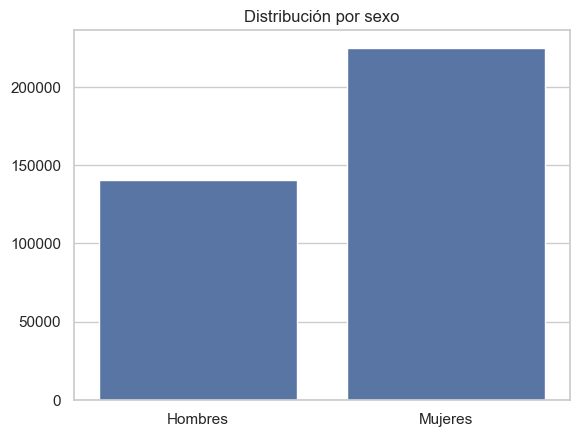

In [107]:
sexo = {
    'Hombres': df['docentes_hombres'].sum(),
    'Mujeres': df['docentes_mujeres'].sum()
}

sns.barplot(x=list(sexo.keys()), y=list(sexo.values()))
plt.title("Distribución por sexo")
plt.show()

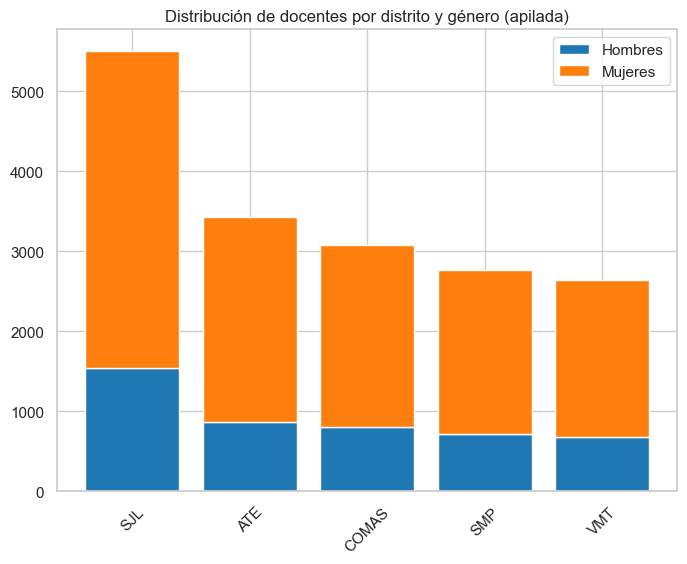

In [108]:
df_dist_genero = df.groupby('dist')[['docentes_hombres', 'docentes_mujeres', 'docentes_total']].sum().sort_values(by = 'docentes_total',ascending=False).reset_index().head(5)

distrito = df_dist_genero['dist'].map({'SAN JUAN DE LURIGANCHO': 'SJL',
                                        'ATE': 'ATE',
                                        'COMAS': 'COMAS',
                                        'SAN MARTIN DE PORRES': 'SMP',
                                        'VILLA MARIA DEL TRIUNFO': 'VMT'})
hombres = df_dist_genero['docentes_hombres']
mujeres = df_dist_genero['docentes_mujeres']

x = np.arange(len(distrito))

plt.figure(figsize=(8, 6))
plt.bar(x, hombres, label='Hombres', color='#1f77b4')
plt.bar(x, mujeres, bottom=hombres, label='Mujeres', color='#ff7f0e')
plt.xticks(x, distrito)
plt.title('Distribución de docentes por distrito y género (apilada)')
plt.xticks(rotation=45)
plt.legend()

plt.show()


Top regiones con más docentes

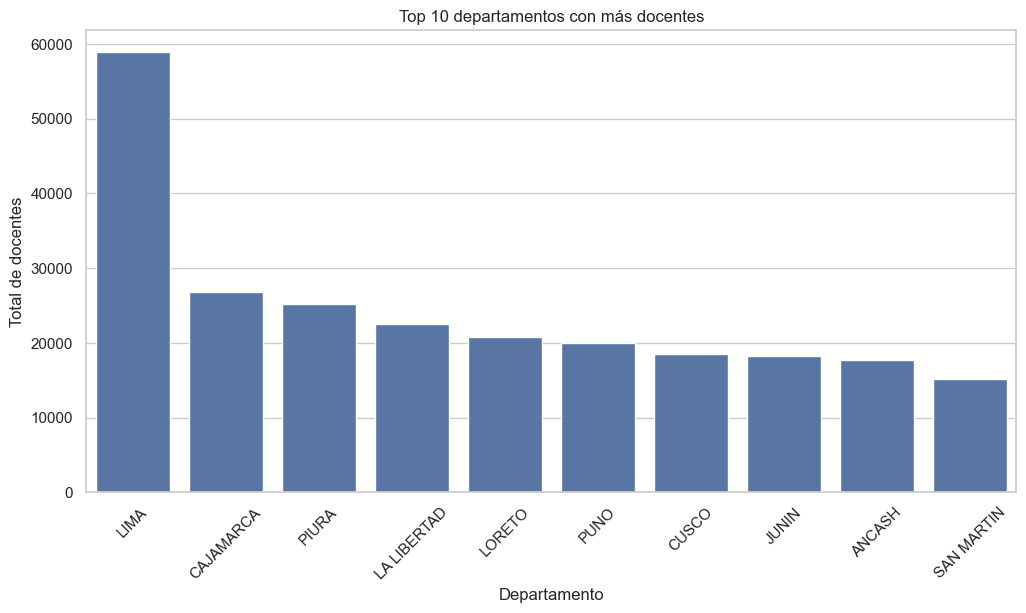

In [109]:
region = df.groupby('dpto')['docentes_total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region.head(10), x='dpto', y='docentes_total')
plt.title("Top 10 departamentos con más docentes")
plt.xticks(rotation=45)
plt.xlabel("Departamento")
plt.ylabel("Total de docentes")
plt.show()


% de docentes titulados vs. no titulados.

In [110]:
titulados = df['docentes_con_titulo'].sum()
no_titulados = df['docentes_sin_titulo'].sum()

print(f"Total de docentes titulados: {titulados}")
print(f"Total de docentes no titulados: {no_titulados}")
print(f"Porcentaje de docentes titulados: {titulados / (titulados + no_titulados) * 100:.2f}%")

Total de docentes titulados: 353273
Total de docentes no titulados: 12709
Porcentaje de docentes titulados: 96.53%


¿En que departamento se concentra más la cantidad de docentes sin título?

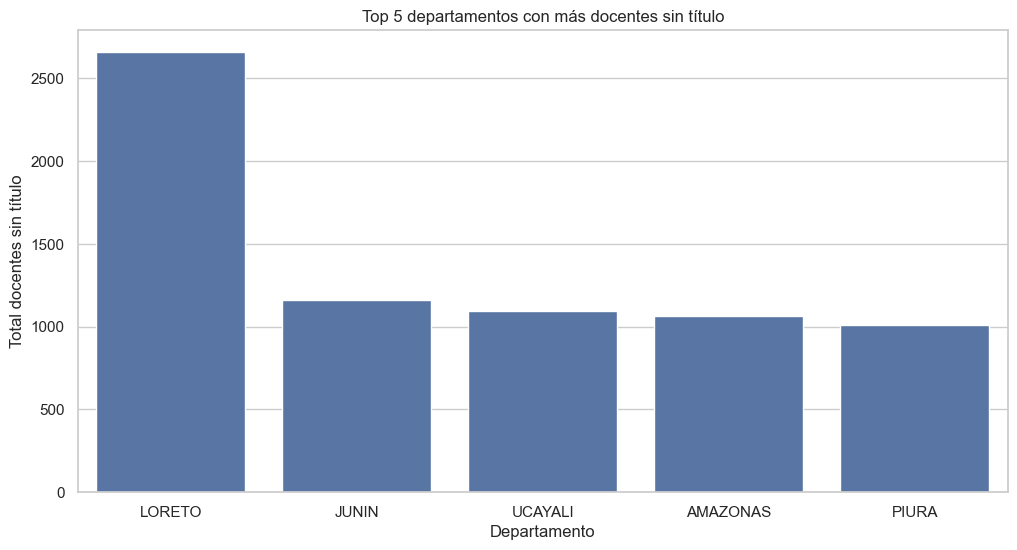

In [111]:
sin_titulo_depto = df.groupby('dpto')['docentes_sin_titulo'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sin_titulo_depto.head(5), x='dpto', y='docentes_sin_titulo')
plt.title("Top 5 departamentos con más docentes sin título")

plt.xlabel("Departamento")
plt.ylabel("Total docentes sin título")
plt.show()

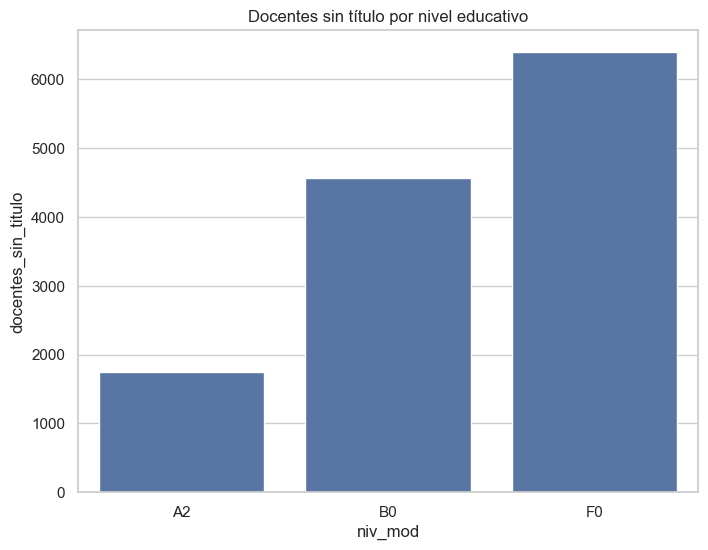

In [112]:
sin_titulo_nivel = df.groupby('niv_mod')['docentes_sin_titulo'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=sin_titulo_nivel, x='niv_mod', y='docentes_sin_titulo')
plt.title("Docentes sin título por nivel educativo")
plt.show()

% de docentes sin titulos por área de censo

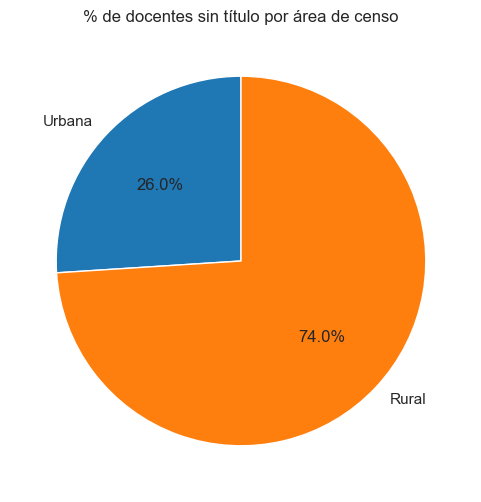

In [113]:
sin_titulo_area = df.groupby('area_censo')['docentes_sin_titulo'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(
    sin_titulo_area['docentes_sin_titulo'],
    labels=['Urbana', 'Rural'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e']  # colores opcionales
)

plt.title('% de docentes sin título por área de censo')
plt.show()

Insight: ¿Cuál es el departamento con más docentes sin título? ¿Se concentra más en áreas rurales? ¿Qué nivel tiene mayor proporción?
- El departamento de **Loreto** concentra el mayor número de docentes sin título.
- Las áreas rurales tienen una mayor proporción que las urbanas.
- El nivel Secundaria (F0) es donde se observa la mayor cantidad de docentes sin título.

.

% de docentes por rango de edad

In [117]:
edades = ['docentes_25_menos_años', 'docentes_2635_años', 'docentes_3645_años',
          'docentes_4655_años', 'docentes_5665_años', 'docentes_66_a_mas_años']

edad_kpi = {edad: df[edad].sum() for edad in edades}

for k, v in edad_kpi.items():
    print(f"{k}: {(v / total_docentes) * 100:.2f}%")

docentes_25_menos_años: 1.24%
docentes_2635_años: 11.58%
docentes_3645_años: 29.02%
docentes_4655_años: 34.06%
docentes_5665_años: 24.06%
docentes_66_a_mas_años: 0.05%


Ranking de regiones con más docentes sin título

In [118]:
region_kpi = df.groupby('dpto').agg({
    'docentes_sin_titulo': 'sum'
}).reset_index().sort_values(by='docentes_sin_titulo', ascending=False)

region_kpi.head(10)

,dpto,docentes_sin_titulo
15,LORETO,2659
11,JUNIN,1161
24,UCAYALI,1096
0,AMAZONAS,1064
19,PIURA,1012
21,SAN MARTIN,731
14,LIMA,711
18,PASCO,490
12,LA LIBERTAD,479
8,HUANCAVELICA,423


Proporción por nivel educativo

In [119]:
nivel_kpi = df.groupby('niv_mod').agg({
    'docentes_total': 'sum'
}).reset_index()

nivel_kpi['pct_docentes'] = round((nivel_kpi['docentes_total'] / total_docentes) * 100,2)
nivel_kpi

,niv_mod,docentes_total,pct_docentes
0,A2,58760,16.06
1,B0,151929,41.51
2,F0,155293,42.43
